# image load

In [ ]:
import numpy as np
import cv2
from skimage import data

In [ ]:
cat_rgb = data.chelsea() # take the test image of cat!
cat_gray = cv2.cvtColor(cat_rgb,cv2.COLOR_RGB2GRAY)

print(f"ndim:{cat_rgb.ndim},shape:{cat_rgb.shape},dtype:{cat_rgb.dtype},itemsize:{cat_rgb.itemsize}")
print(f"ndim:{cat_gray.ndim},shape:{cat_gray.shape},dtype:{cat_gray.dtype},itemsize:{cat_gray.itemsize}")

ndim:3,shape:(300, 451, 3),dtype:uint8,itemsize:1
ndim:2,shape:(300, 451),dtype:uint8,itemsize:1


# 이미지 옆에 붙이기

In [ ]:
cat_hstack = np.hstack( (cat_rgb,cat_rgb) )
print(cat_hstack.shape)

(300, 902, 3)


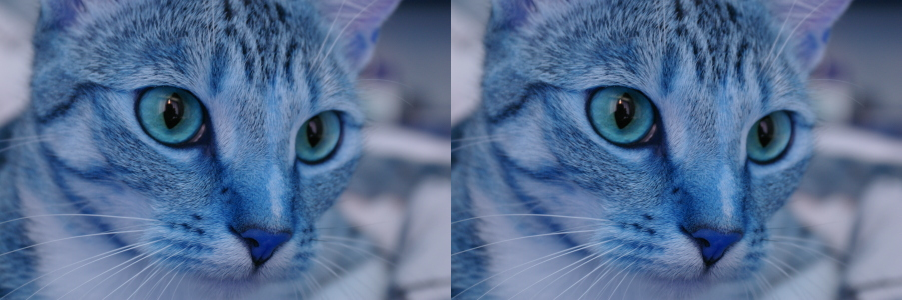

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(cat_hstack)

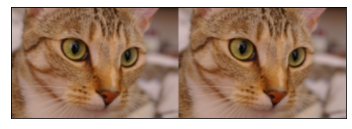

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cat_hstack, interpolation='bicubic')
plt.xticks([]); plt.yticks([])
plt.show()

# 이미지 위아래로 붙이기

In [ ]:
cat_vstack = np.vstack( (cat_rgb,cat_rgb))   #튜플로 묶여서 들어감
print(cat_vstack.shape)

(600, 451, 3)


(600, 451, 3)


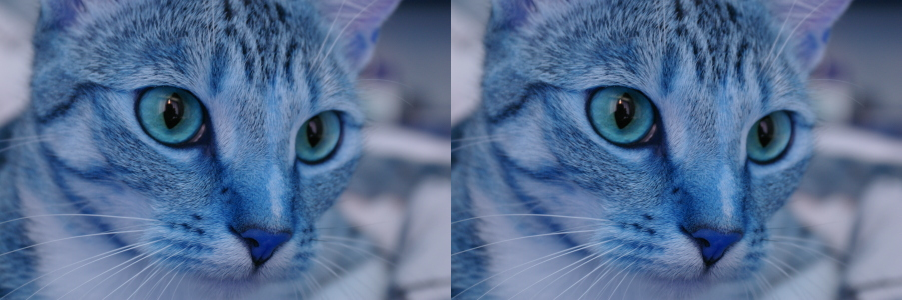

In [ ]:
cat_vstack = np.vstack( (cat_rgb,cat_rgb))   #튜플로 묶여서 들어감
print(cat_vstack.shape)
cv2_imshow(cat_hstack)

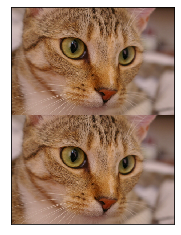

In [ ]:
plt.imshow(cat_vstack, interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()

# 축을 지정하여 붙이기.

`np.concatenate(ndarrays' tuple, axis=0)`

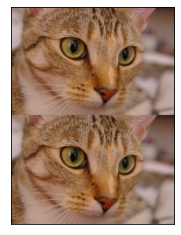

In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=0 )   #행 기준
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

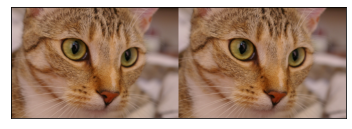

In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=1 )   #열 기준
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=2 )
print(r.shape)
'''
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()
'''

(300, 451, 6)


'\nplt.imshow(r)\nplt.xticks([]),plt.yticks([])\nplt.show()\n'

(300, 451, 6)


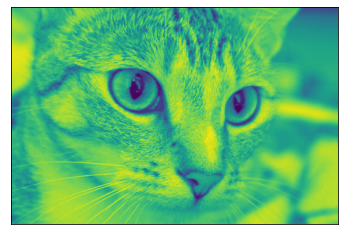

In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=2 )
print(r.shape)

plt.imshow(r[:,:,3])
plt.xticks([]),plt.yticks([])
plt.show()


In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=2 )
print(r.shape)

'''
plt.imshow(r[:,:,:])
plt.xticks([]),plt.yticks([])
plt.show()
'''

(300, 451, 6)


'\nplt.imshow(r[:,:,:])\nplt.xticks([]),plt.yticks([])\nplt.show()\n'

# 새로운 축으로 병합




In [ ]:
r = np.stack( (cat_rgb,cat_rgb), axis=0)
print(r.shape)

(2, 300, 451, 3)


In [ ]:
r = np.stack( (cat_rgb,cat_rgb), axis=-1)
print(r.shape)

(300, 451, 3, 2)


In [ ]:
r = np.stack( (cat_rgb,cat_rgb), axis=1)
print(r.shape)

(300, 2, 451, 3)


(300, 451)
(300, 451, 3)


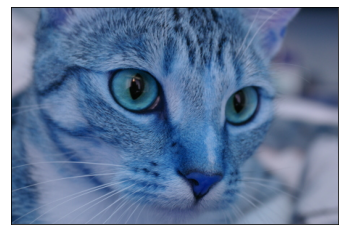

In [ ]:
print(cat_rgb[:,:,2].shape)
r = np.stack( (cat_rgb[:,:,2],cat_rgb[:,:,1],cat_rgb[:,:,0]) , axis=2 )
print(r.shape)

plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()


# 수평으로 분리하기

In [ ]:
img_hsplit= np.hsplit(cat_rgb[:,:450,:],3)
print(np.shape(img_hsplit))

(3, 300, 150, 3)


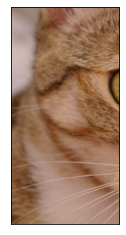

In [ ]:
plt.imshow(img_hsplit[0])
plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
img_hsplit= np.hsplit(cat_rgb,(200,300,350))
print(len(img_hsplit))

for idx, c in enumerate(img_hsplit):
  print(f"{idx:02d}, {c.shape}")

4
00, (300, 200, 3)
01, (300, 100, 3)
02, (300, 50, 3)
03, (300, 101, 3)


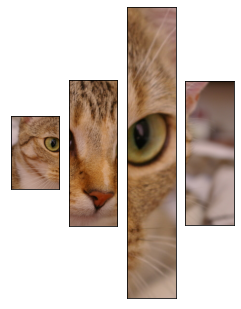

In [ ]:
plt.figure(figsize=(4,7))
plt.subplot(1,4,1)
plt.imshow(img_hsplit[0])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img_hsplit[1])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img_hsplit[2])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img_hsplit[3])
plt.xticks([]),plt.yticks([])

plt.show()



# 수직으로 분리하기

In [ ]:
img_vsplit = np.vsplit(cat_rgb,2)
print(np.shape(img_vsplit))

(2, 150, 451, 3)


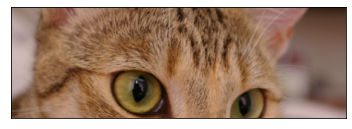

In [ ]:
plt.imshow(img_vsplit[0])
plt.xticks([]),plt.yticks([])
plt.show()

# 축을 지정하여 분리

`np.split( ndarrays' tuple, indice tuple, axis=0)`

In [ ]:
img_mono = np.split(cat_rgb,3,axis=-1)   #차원을 늘려서 찢는다
print(np.shape(img_mono))

#(3, 300, 451, 1)이 3개 있음

(3, 300, 451, 1)


(300, 451, 1)
(300, 451)


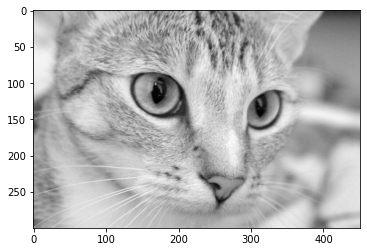

In [ ]:

print(img_mono[0].shape)
r = np.squeeze(img_mono[0])   #squeeze : 차원 축소, 값이 1이 아니면 안됨..?
print(r.shape)
plt.imshow(np.squeeze(img_mono[0]),cmap='gray')

(300, 451, 1)
(300, 451)


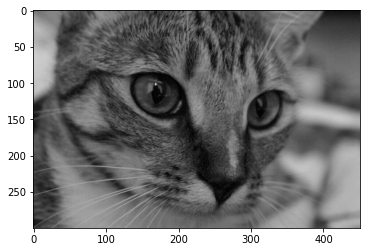

In [ ]:
print(img_mono[2].shape)
r = np.squeeze(img_mono[2])
print(r.shape)
plt.imshow(np.squeeze(img_mono[2]),cmap='gray')

# 조건에 의한 indexing

True, False로 구성된 ndarray(or mask)를 통한 **특정 ndarray**에  indexing.


`np.where (조건식, [,True일때 값, False일때 값])`
* 조건식에 해당(조건식이 True인) 인덱스의 tuple or 조건식의 결과에 따라 변경된 값으로 채워진 `ndarray`를 반환.


(300, 451) <class 'numpy.ndarray'>


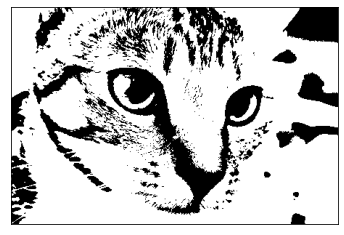

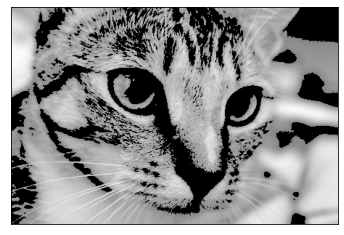

In [ ]:
mask = np.where(cat_gray>100,1,0)   #100이상이면 1로 만들기 나머지는 0으로 만들기
print(mask.shape,type(mask))
plt.figure()
plt.imshow(mask,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

r = cat_gray * mask
plt.figure()
plt.imshow(r,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()


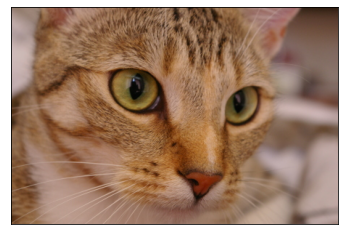

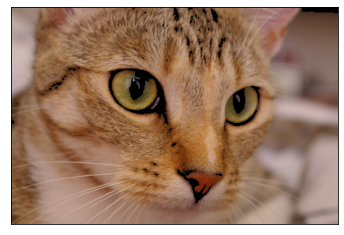

In [ ]:
plt.figure()
plt.imshow(cat_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

r = cat_rgb.copy()
r[cat_gray<50] = (0,0,0)   #50보다 작으면 0으로 처리
plt.figure()
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

`np.where( ndarray, 조건식 )`

* 조건식에 해당하는(True인) index를 반환함.
* 차원이 2이상일 경우, 차원수에 해당하는 갯수의 `list`를 반환.

In [ ]:
indice = np.where(cat_gray<10)
print(indice[0])
print(np.shape(indice)) # 293개의 pixel의 인덱스...
r = np.stack( (indice[0],indice[1]),axis=-1)
print(cat_gray[r[0][0],r[0][1]])
r[0:10]

[ 91  92  93  94  94  94  95  95  95  96  96  96 105 105 105 105 106 107
 107 108 108 108 108 109 109 109 109 109 109 110 110 110 110 110 110 111
 111 111 111 111 111 111 112 112 112 112 112 112 112 113 113 113 113 113
 113 113 113 113 114 114 114 114 114 114 114 114 114 115 115 115 115 115
 115 115 115 116 116 116 116 116 116 117 117 117 117 117 117 117 117 118
 118 118 118 118 118 118 118 119 119 119 119 119 119 119 119 119 119 119
 120 120 120 120 120 120 120 120 120 120 120 120 121 121 121 121 121 121
 121 121 121 121 121 121 121 122 122 122 122 122 122 122 122 122 122 122
 122 123 123 123 123 123 123 123 123 123 123 124 124 124 124 124 124 124
 124 124 125 125 125 125 125 125 125 125 126 126 126 126 126 127 127 127
 129 130 131 132 132 133 133 137 137 137 137 138 138 138 138 138 138 138
 138 138 139 139 139 139 139 139 139 139 139 140 140 140 140 140 140 140
 140 141 141 141 141 141 141 141 142 142 142 142 142 142 143 143 143 143
 143 144 144 144 145 145 241 261 262]
(2, 243)
9


array([[ 91, 188],
       [ 92, 189],
       [ 93, 174],
       [ 94, 174],
       [ 94, 175],
       [ 94, 176],
       [ 95, 174],
       [ 95, 176],
       [ 95, 177],
       [ 96, 176]])

# 통계적 처리

`np.mean()`, `np.max`, `np.min`

In [ ]:
g_m = np.mean(cat_gray)
print(g_m) # 모든 수에 대해 계산됨.

119.48269031781227


In [ ]:
rgb_m = np.mean(cat_rgb)
print(rgb_m) # 모든 수에 대해 계산됨.

115.30514166050752


In [ ]:
rgb_m = np.mean(cat_rgb, axis=-1)
print(rgb_m.shape) # 모든 채널을 바탕으로..

(300, 451)


In [ ]:
rgb_m = np.mean(cat_rgb, axis=0)
print(rgb_m.shape) # axis=0를 바탕으로 평균을 계산. 즉 결과는 column으로 남음.

(451, 3)


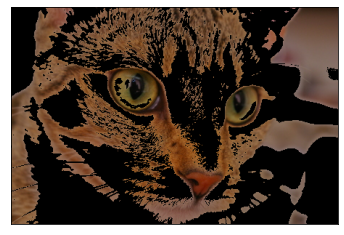

In [ ]:
#test

gray_m = np.mean(cat_gray)
r= cat_rgb.copy()
r[cat_gray>gray_m]=(0,0,0)
plt.figure()
plt.imshow(r)
plt.xticks([]), plt.yticks([])
plt.show()

# 기타

In [ ]:
a = np.array([1,2,3,4,0,0,4,3,2,1,0])
np.nonzero(a)

(array([0, 1, 2, 3, 6, 7, 8, 9]),)

In [ ]:
a = np.array([[1,2,3,4,0],[0,4,3,2,1,]])
np.nonzero(a)

(array([0, 0, 0, 0, 1, 1, 1, 1]), array([0, 1, 2, 3, 1, 2, 3, 4]))

In [ ]:
np.all?

In [ ]:
np.all([1,1,1])

True

In [ ]:
np.all([1,1,0])

False

In [ ]:
np.any([1,1,1])

True

In [ ]:
np.any([1,1,0])

True

In [ ]:
np.any([0,0,0])

False

In [ ]:
a = np.arange(0,10)
b = np.arange(0,10)
c = a #실제적으로 a,b는 같은 객체를 가르키고 있는 별칭관계.

print(id(a))
print(id(b))
print(id(c))

140350309841536
140350309840176
140350309841536


In [ ]:
b[a>5] = 0
b

array([0, 1, 2, 3, 4, 5, 0, 0, 0, 0])

In [ ]:
np.all(a==b)

False

In [ ]:
np.all(a==c)

True

In [ ]:
a is b

False

In [ ]:
a is c

True

In [ ]:
a is a

True

In [ ]:
d = a.copy()
a is d

False

In [ ]:
np.all(a == d)

True